In [1]:
# Please execute the main EDA and data cleaning file before running this code.

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
import math

import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
pd.set_option('display.float_format', '{:.5f}'.format)

### Read the dataframes for different product categories

In [5]:
# Reading the file

df_ha = pd.read_csv('df_ha_weekly.csv', na_values=['', ' '])

In [6]:
print(df_ha.shape)

(49, 24)


## Building model for Home Audio

In [7]:
df_ha.describe()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock Index,Mean Temp (°C),Total Rain (mm)
count,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,...,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000
mean,54.59184,4879276.83325,2344.38839,5.60009,3623.48275,2.60817,2090.69945,36.09918,0.44898,0.44898,...,1638360.75583,39494464.64688,12510863.47433,18149359.15021,953061.22449,9800519.40514,48.22449,1155.72012,11.41840,2.64188
std,14.96652,2434661.00804,1121.24761,0.85223,415.39881,0.20236,139.43798,3.80429,0.50254,0.50254,...,2026298.16610,16177479.66184,4860946.49594,16960310.76097,1779416.56194,18671320.99809,2.95142,79.61158,8.88935,3.29828
min,27.00000,106915.00000,39.00000,2.79487,3042.86399,1.81236,1831.35088,29.77527,0.00000,0.00000,...,1504.67345,2140770.31456,882667.51444,4980687.97045,0.00000,0.00000,44.00000,1015.00000,-7.26667,0.00000
25%,43.00000,3698313.70415,1839.65913,5.05619,3305.38067,2.52357,2026.08190,33.64486,0.00000,0.00000,...,324590.08328,38219976.65040,11755954.50363,9846568.90708,0.00000,0.00000,46.00000,1065.85714,5.16667,0.30000
50%,55.00000,4476785.87476,2190.31827,5.65160,3492.26805,2.60011,2077.25536,35.13843,0.00000,0.00000,...,1424014.85745,45643673.48266,15354838.70968,11763933.85523,0.00000,0.00000,47.00000,1194.00000,10.90000,1.10000
75%,67.00000,5358723.48818,2572.87884,5.96299,3843.60904,2.69439,2134.87466,38.04929,1.00000,1.00000,...,2032258.06452,51198394.27227,15605218.37938,15603225.80645,1683870.96774,11260967.74194,50.00000,1222.00000,20.00000,4.20000
max,79.00000,17212005.93803,8055.47499,7.41429,4675.97436,3.38462,2741.41026,45.67447,1.00000,1.00000,...,7776942.99897,55033046.50298,16641935.48387,72093251.50133,6096774.19355,61170967.74194,55.42857,1242.00000,24.56667,12.80000


In [8]:
df_ha.columns

Index(['week_number', 'gmv', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'List_Price', 'discount', 'pay_day_flag',
       'sale_day_flag', 'prepaid_frac', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)'],
      dtype='object')

In [9]:
# taking all the numeric columns for correlation
corr_variables = [ 'gmv', 'units', 'sla', 'product_mrp','pay_day_flag', 'sale_day_flag',
      'product_procurement_sla', 'List_Price', 'discount', 'TV', 'Digital', 'Sponsorship', 
      'Content Marketing','Online marketing', 'Affiliates', 'SEM', 'Radio',
      'Other', 'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)']

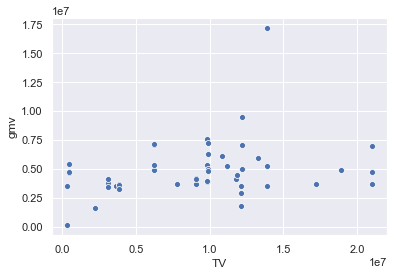

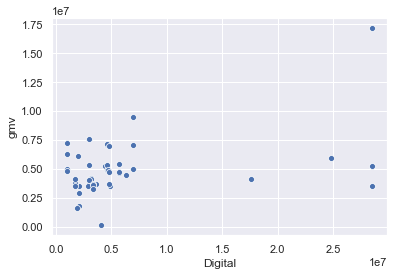

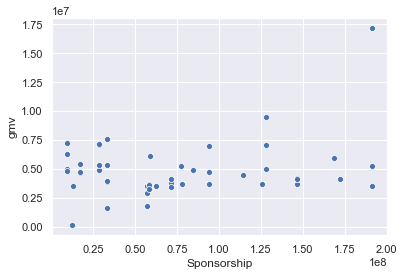

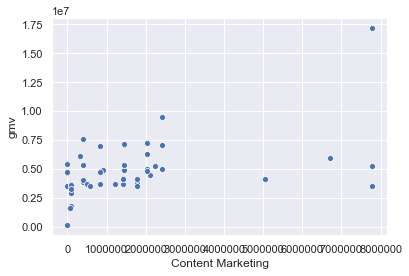

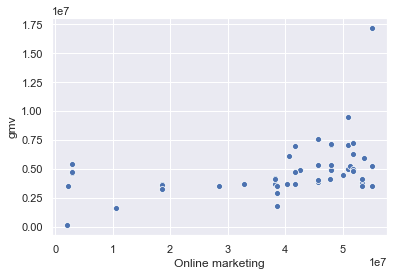

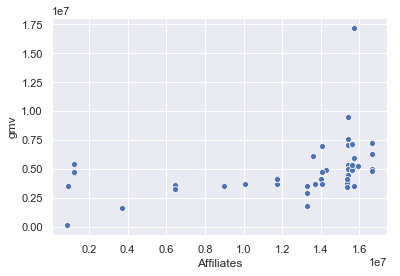

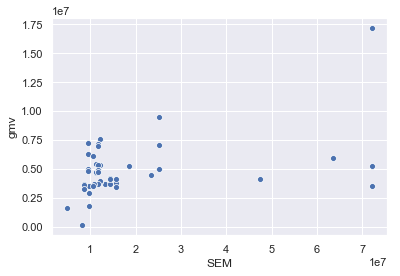

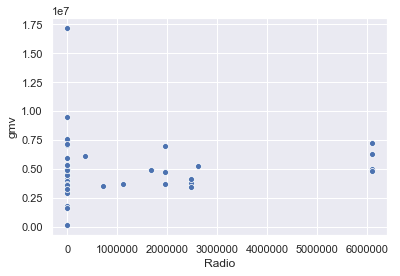

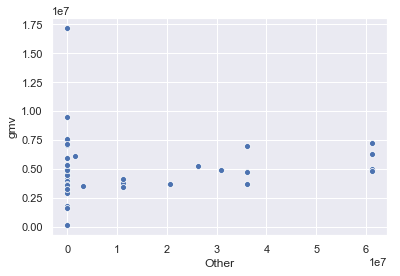

In [10]:
# Plotting scatter plots for adspends vs GMV
cols = ['TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio','Other']

for col in cols:
    sns.scatterplot(x=col, y="gmv", data=df_ha)
    plt.show()

In [11]:
#Creating dataframe with the numeric variables
df_ha_corr = df_ha[corr_variables]

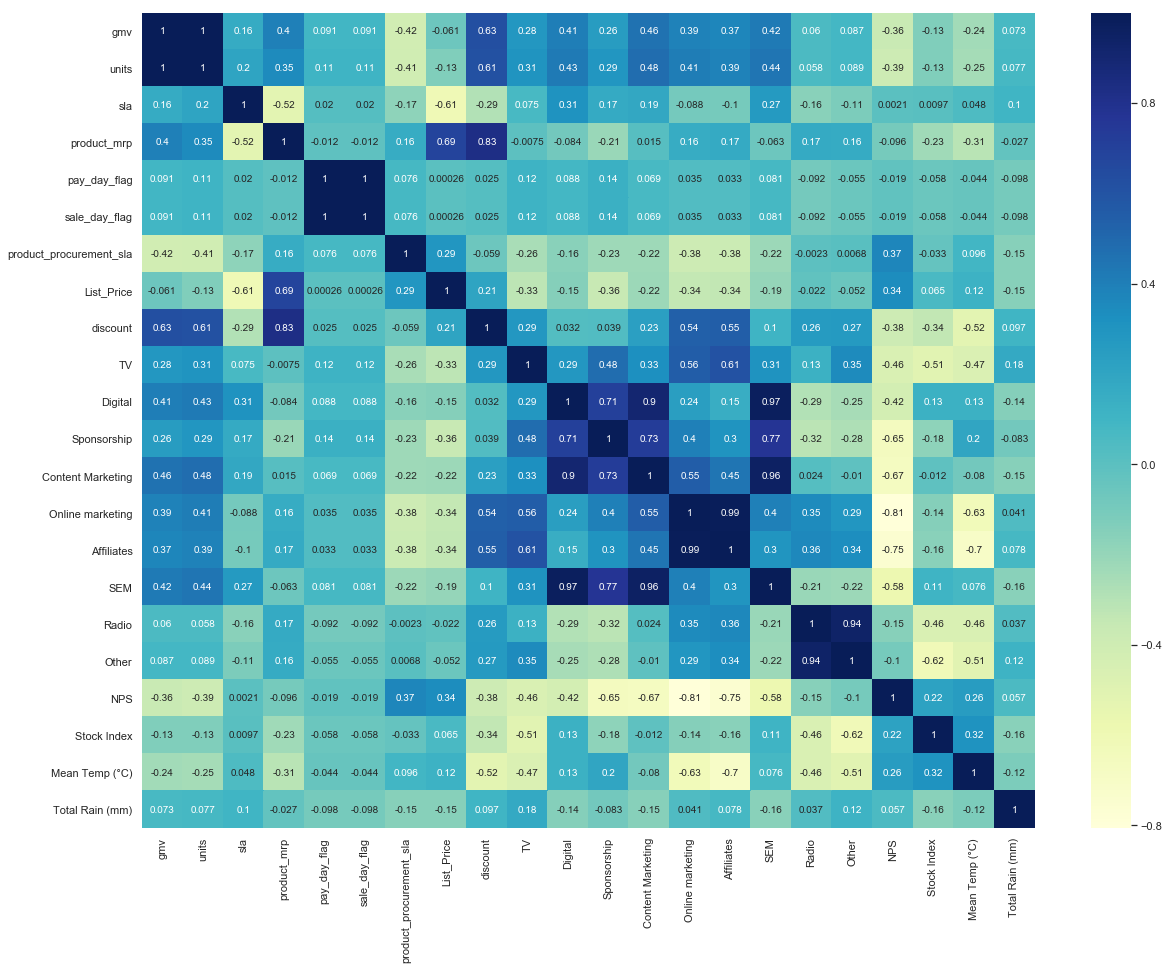

In [12]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,15)) 
sns.heatmap(df_ha_corr.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [13]:
# Following are highly corelated 
# 1. gmv and units. So, we would drop units.
# 2. Digital is highly corelated to content marketing, SEM . So, we would drop Digital & SEM.
# 3. Affiliate marketing is highly corelated with online marketing. So, we would drop affiliate marketing.
# 4. Radio and Other is highly corelated. So, we would drop other.
# 5. pay_day_flag and special_sale_day flag
# 6. NPS has high negative corelation with online marketing.
# 7. product_mrp and discount is correlated. So drop product mrp

df_ha_corr.drop(['units','product_mrp','pay_day_flag', 'Digital',  'SEM', 'Affiliates', 'Other', 'NPS', 'Sponsorship'], axis = 1, inplace = True)
df_ha.drop(['units','product_mrp' , 'pay_day_flag', 'Digital',  'SEM', 'Affiliates', 'Other', 'NPS', 'Sponsorship'], axis = 1, inplace = True)

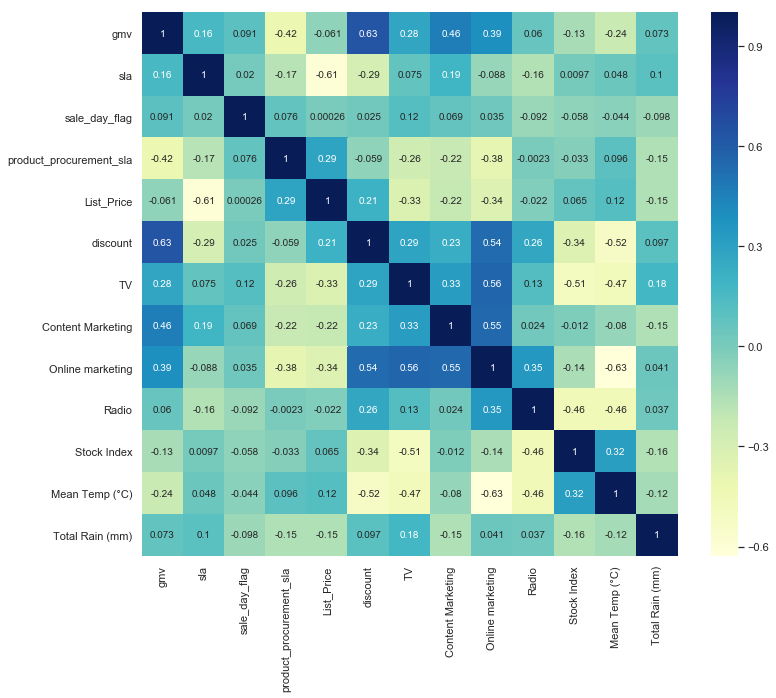

In [14]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(12,10)) 
sns.heatmap(df_ha_corr.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
# Copying the dataframe to be used for multiplicative model
df_ha_mult = df_ha.copy()

In [16]:
### Dropping week_number feature
df_ha.drop(['week_number'], axis = 1, inplace = True)

In [17]:
df_ha.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'List_Price', 'discount',
       'sale_day_flag', 'prepaid_frac', 'TV', 'Content Marketing',
       'Online marketing', 'Radio', 'Stock Index', 'Mean Temp (°C)',
       'Total Rain (mm)'],
      dtype='object')

In [18]:
# Scaling the numeric columns and removing flag variable
numeric_variables_ha = ['gmv', 'sla', 'product_procurement_sla', 'List_Price', 'discount',
       'prepaid_frac', 'TV', 'Content Marketing',
       'Online marketing', 'Radio', 'Stock Index', 'Mean Temp (°C)',
       'Total Rain (mm)']

In [19]:
# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
df_ha[numeric_variables_ha] = scaler.fit_transform(df_ha[numeric_variables_ha])

In [20]:
# Splitting the data in test and train
y = df_ha.pop('gmv')
X = df_ha

X_train_ha, X_test_ha, y_train_ha, y_test_ha = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

In [21]:
y_train_ha.shape

(46,)

### Building first linear model using RFE

In [22]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ha, y_train_ha)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True False  True False False False  True  True False False False
 False]
[1 1 7 1 2 5 4 1 1 6 3 9 8]


In [23]:
# RFE with 5 features
lm = LinearRegression()
rfe1 = RFE(lm, 5)

# Fit with 5 features
rfe1.fit(X_train_ha, y_train_ha)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True False  True False False False  True  True False False False
 False]
[1 1 7 1 2 5 4 1 1 6 3 9 8]


In [24]:
list(zip(X_train_ha.columns,rfe1.support_,rfe1.ranking_))

[('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('List_Price', False, 7),
 ('discount', True, 1),
 ('sale_day_flag', False, 2),
 ('prepaid_frac', False, 5),
 ('TV', False, 4),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Radio', False, 6),
 ('Stock Index', False, 3),
 ('Mean Temp (°C)', False, 9),
 ('Total Rain (mm)', False, 8)]

In [25]:
# Subset the features selected by rfe1
col = X_train_ha.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe1 = X_train_ha[col]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [26]:
# Fitting the model with 10 variables
lm = sm.OLS(y_train_ha, X_train_rfe1).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     19.43
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.97e-10
Time:                        14:29:06   Log-Likelihood:                -37.586
No. Observations:                  46   AIC:                             87.17
Df Residuals:                      40   BIC:                             98.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [27]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Online marketing,2.24000
4,Content Marketing,1.58000
3,discount,1.54000
2,product_procurement_sla,1.26000
1,sla,1.22000
0,const,1.00000


In [28]:
# Dropping sla as it has high p-value
col = col.drop('sla', 1)

In [29]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ha[col])

lm = sm.OLS(y_train_ha, X_lm2).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     20.35
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.67e-09
Time:                        14:29:07   Log-Likelihood:                -40.767
No. Observations:                  46   AIC:                             91.53
Df Residuals:                      41   BIC:                             100.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [30]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Online marketing,2.22000
3,Content Marketing,1.47000
2,discount,1.44000
1,product_procurement_sla,1.21000
0,const,1.00000


In [31]:
# Predictions

X_test_new = X_test_ha[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred - y_test_ha))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ha)**2)

print(RMSE)
print(MSE)

0.29317388864952454
0.08595092898588381


#### This is linear model. This is having R-Square of .601 and Adj. R-Square .562 .

### Multiplicative Model

In [32]:
# Analysing the dataframe

df_ha_mult.describe()

,week_number,gmv,sla,product_procurement_sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Content Marketing,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000
mean,54.59184,4879276.83325,5.60009,2.60817,2090.69945,36.09918,0.44898,0.27959,9053514.42338,1638360.75583,39494464.64688,953061.22449,1155.72012,11.41840,2.64188
std,14.96652,2434661.00804,0.85223,0.20236,139.43798,3.80429,0.50254,0.21591,5532510.83772,2026298.16610,16177479.66184,1779416.56194,79.61158,8.88935,3.29828
min,27.00000,106915.00000,2.79487,1.81236,1831.35088,29.77527,0.00000,0.14012,347306.78058,1504.67345,2140770.31456,0.00000,1015.00000,-7.26667,0.00000
25%,43.00000,3698313.70415,5.05619,2.52357,2026.08190,33.64486,0.00000,0.18568,3879672.72704,324590.08328,38219976.65040,0.00000,1065.85714,5.16667,0.30000
50%,55.00000,4476785.87476,5.65160,2.60011,2077.25536,35.13843,0.00000,0.20644,9848136.05973,1424014.85745,45643673.48266,0.00000,1194.00000,10.90000,1.10000
75%,67.00000,5358723.48818,5.96299,2.69439,2134.87466,38.04929,1.00000,0.22950,12145457.92877,2032258.06452,51198394.27227,1683870.96774,1222.00000,20.00000,4.20000
max,79.00000,17212005.93803,7.41429,3.38462,2741.41026,45.67447,1.00000,0.97436,21000000.00000,7776942.99897,55033046.50298,6096774.19355,1242.00000,24.56667,12.80000


In [33]:
# Dropping week_number
df_ha_mult = df_ha_mult.drop(['week_number'], axis = 1)

In [34]:
df_ha_mult.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'List_Price', 'discount',
       'sale_day_flag', 'prepaid_frac', 'TV', 'Content Marketing',
       'Online marketing', 'Radio', 'Stock Index', 'Mean Temp (°C)',
       'Total Rain (mm)'],
      dtype='object')

In [35]:
# Scaling for all columns except the flag column
numeric_variables_ha_mult = ['gmv', 'sla', 'product_procurement_sla', 'List_Price', 'discount',
        'prepaid_frac', 'TV',
       'Content Marketing', 'Online marketing', 'Radio', 'Stock Index',
       'Mean Temp (°C)', 'Total Rain (mm)']

In [36]:
# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
df_ha_mult[numeric_variables_ha_mult] = scaler.fit_transform(df_ha_mult[numeric_variables_ha_mult])

In [37]:
df_ha_mult.shape

(49, 14)

In [38]:
# Taking natural log

for col in list(df_ha_mult.columns):
    df_ha_mult[col] = np.log(df_ha_mult[col])

In [39]:
df_ha_mult.describe()

,gmv,sla,product_procurement_sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Content Marketing,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-1.56083,-0.71432,-0.79329,-1.54189,-1.41312,nan,-2.90746,-1.76588,-3.18081,-0.38254,nan,-1.49593,-0.94013,-3.75342
50%,-1.36464,-0.48059,-0.69109,-1.30857,-1.08671,nan,-2.53203,-0.77647,-1.69855,-0.19543,nan,-0.23756,-0.56093,-2.45413
75%,-1.18080,-0.37713,-0.57804,-1.09805,-0.65315,0.00000,-2.23365,-0.55990,-1.34256,-0.07526,-1.28666,-0.09223,-0.15485,-1.11436
max,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000


In [40]:
# Handling the negative infinite value as NaN and filling all NaN as 0
df_ha_mult.replace([-np.inf, np.inf], np.nan,inplace=True)
df_ha_mult.fillna(0,inplace=True)

In [41]:
df_ha_mult.describe()

,gmv,sla,product_procurement_sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Content Marketing,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000
mean,-1.31057,-0.50368,-0.66469,-1.32789,-1.05585,0.00000,-2.27896,-1.30270,-2.76127,-0.64865,-0.32265,-0.58915,-0.62950,-1.44612
std,0.43519,0.28441,0.21046,0.55935,0.64710,0.00000,0.94528,1.56602,2.78908,1.30662,0.64423,0.76143,0.56503,1.28095
min,-2.41799,-1.30308,-1.10921,-3.20219,-2.64288,0.00000,-3.83799,-8.51163,-14.46020,-6.45256,-2.84385,-2.28946,-2.19827,-4.44657
25%,-1.56033,-0.70460,-0.79053,-1.52555,-1.40703,0.00000,-2.85327,-1.76588,-2.98753,-0.38254,-0.00000,-0.97060,-0.89659,-2.54945
50%,-1.33100,-0.47444,-0.68619,-1.28511,-1.07744,0.00000,-2.48148,-0.77647,-1.69855,-0.19543,0.00000,-0.23756,-0.50630,-1.23572
75%,-1.16930,-0.36988,-0.53957,-1.09011,-0.58595,0.00000,-2.15857,-0.55631,-1.34256,-0.06489,0.00000,-0.06366,-0.15119,-0.00784
max,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


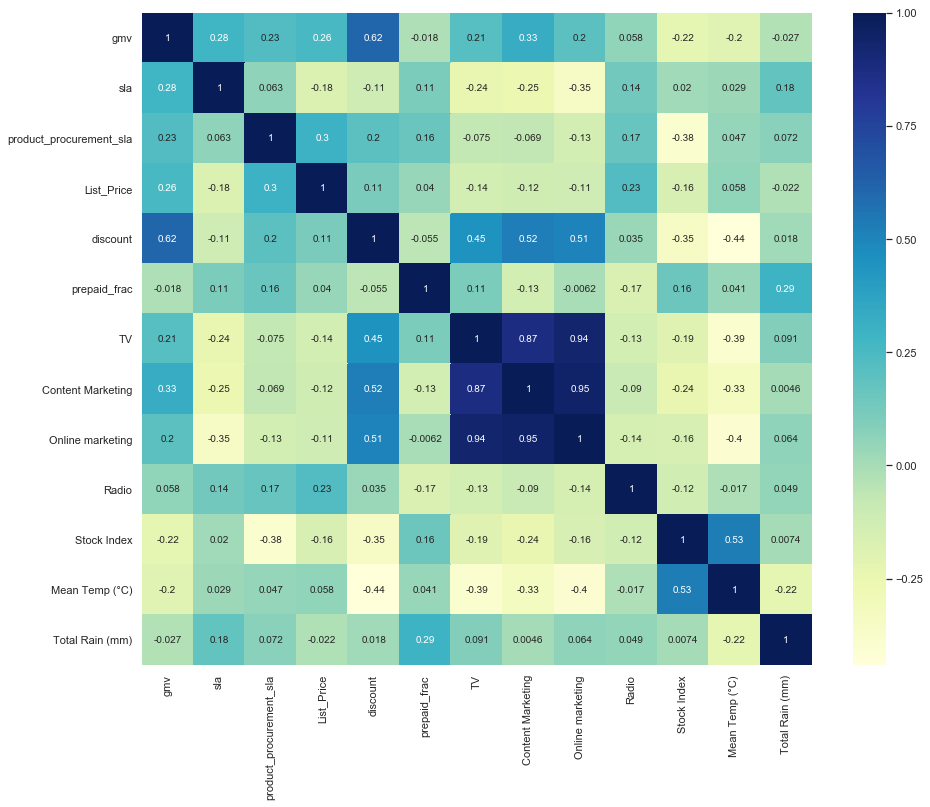

In [42]:
#Correlation Plot for weekly data
plt.figure(figsize=(15,12)) 
sns.heatmap(df_ha_mult[numeric_variables_ha_mult].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [43]:
### Dropping corelated column and flag columns
### TV is highly correlated to Online marketing and Content Marketing.

df_ha_mult.drop(['Online marketing', 'TV','sale_day_flag'], axis = 1, inplace = True)

In [44]:
# Split the dataset into  test and train
y = df_ha_mult.pop('gmv')
X = df_ha_mult

X_train_ha_mult, X_test_ha_mult, y_train_ha_mult, y_test_ha_mult = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

### Performing RFE with 5 features

In [45]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ha_mult, y_train_ha_mult)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True False  True  True False False  True  True False False]
[1 2 1 1 5 4 1 1 6 3]


In [46]:
list(zip(X_train_ha_mult.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('product_procurement_sla', False, 2),
 ('List_Price', True, 1),
 ('discount', True, 1),
 ('prepaid_frac', False, 5),
 ('Content Marketing', False, 4),
 ('Radio', True, 1),
 ('Stock Index', True, 1),
 ('Mean Temp (°C)', False, 6),
 ('Total Rain (mm)', False, 3)]

In [47]:
# Subset the features selected by rfe
col = X_train_ha_mult.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_rfe = X_train_ha_mult[col]

# Add a constant to the model
X_rfe = sm.add_constant(X_rfe)

In [48]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ha_mult, X_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     11.10
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.50e-07
Time:                        14:29:11   Log-Likelihood:                -6.8150
No. Observations:                  46   AIC:                             25.63
Df Residuals:                      40   BIC:                             36.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2314      0.182     -1.270      

In [49]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.86000
5,Stock Index,1.14000
2,List_Price,1.13000
3,discount,1.12000
4,Radio,1.10000
1,sla,1.05000


In [50]:
# Dropping Stock Index as it has high p-value
col = col.drop('Stock Index', 1)

In [51]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ha_mult[col])

lm2 = sm.OLS(y_train_ha_mult, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     14.03
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.70e-07
Time:                        14:29:14   Log-Likelihood:                -6.9957
No. Observations:                  46   AIC:                             23.99
Df Residuals:                      41   BIC:                             33.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2752      0.163     -1.686      0.0

In [52]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.77000
2,List_Price,1.11000
4,Radio,1.10000
1,sla,1.05000
3,discount,1.01000


In [53]:
# Dropping Radio as it has high p-value
col = col.drop('Radio', 1)

In [54]:
# Let's re-run the model using the selected variables
X_lm3 = sm.add_constant(X_train_ha_mult[col])

lm3 = sm.OLS(y_train_ha_mult, X_lm3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     18.74
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.22e-08
Time:                        14:29:14   Log-Likelihood:                -7.2878
No. Observations:                  46   AIC:                             22.58
Df Residuals:                      42   BIC:                             29.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2898      0.161     -1.799      0.0

In [55]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_lm3.values, i) for i in range(X_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.56000
2,List_Price,1.03000
1,sla,1.02000
3,discount,1.01000


In [56]:
# Predictions

X_test_new = X_test_ha_mult[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm3.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ha_mult))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ha_mult)**2)

print(RMSE)
print(MSE)

0.2809656559492431
0.07894169982298845


#### For Multiplicative model we are getting R-Square of .636 and Adj. R-Square .590. 

### Creating Distributed Lag Model

In [57]:
# We would read the file created for adstock for distributed lag model

df_ha_lagged = pd.read_csv('df_ha_weekly_adstock.csv', na_values=['', ' '])
df_ha_lagged.head()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index,Mean Temp (°C),Total Rain (mm)
0,27,106915.00000,39.00000,2.79487,4675.97436,3.38462,2741.41026,37.29581,1,1,...,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000,54.00000,1177.00000,19.36000,0.00000
1,28,4626311.66664,2168.87884,7.41429,3350.70107,2.76713,2134.87466,31.69068,0,0,...,2858.87955,4067463.59766,1677068.27744,15395201.84794,0.00000,0.00000,54.00000,1177.00000,20.10000,4.41667
2,29,5419499.79489,2522.35865,7.06308,3476.24604,2.66799,2147.92291,33.02496,1,1,...,3535.98260,5030810.23921,2074268.65894,19041433.86456,0.00000,0.00000,54.00000,1177.00000,23.18333,1.40000
3,30,4734138.74952,2314.83846,7.13761,3335.85768,2.76509,2047.03284,32.11654,0,0,...,3874.53412,5512483.55998,2272868.84969,20864549.87287,0.00000,0.00000,54.00000,1177.00000,23.06000,0.90000
4,31,3474489.13610,1629.65913,7.27423,3442.14333,2.69439,2132.70440,32.10833,0,0,...,3446.02124,4980395.49069,2066639.99110,20156643.72176,0.00000,0.00000,55.42857,1185.28571,24.56667,4.63333


In [58]:
# Lets take lag for 2 weeks for some variables
cols = ['gmv', 'product_mrp', 'sla']

for col in cols:
    df_ha_lagged[col + '_lag_1'] = df_ha_lagged[col].shift(1)
    df_ha_lagged[col + '_lag_2'] = df_ha_lagged[col].shift(2)

In [59]:
# Creating moving average for few columns 

cols = ['List_Price', 'discount']
for col in cols:
    df_ha_lagged[col + '_ma_2'] = df_ha_lagged[col].rolling(window=2).mean()
    df_ha_lagged[col + '_ma_3'] = df_ha_lagged[col].rolling(window=3).mean()

In [60]:
df_ha_lagged.head()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,27,106915.00000,39.00000,2.79487,4675.97436,3.38462,2741.41026,37.29581,1,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28,4626311.66664,2168.87884,7.41429,3350.70107,2.76713,2134.87466,31.69068,0,0,...,106915.00000,nan,4675.97436,nan,2.79487,nan,2438.14246,nan,34.49325,nan
2,29,5419499.79489,2522.35865,7.06308,3476.24604,2.66799,2147.92291,33.02496,1,1,...,4626311.66664,106915.00000,3350.70107,4675.97436,7.41429,2.79487,2141.39879,2341.40261,32.35782,34.00382
3,30,4734138.74952,2314.83846,7.13761,3335.85768,2.76509,2047.03284,32.11654,0,0,...,5419499.79489,4626311.66664,3476.24604,3350.70107,7.06308,7.41429,2097.47787,2109.94347,32.57075,32.27739
4,31,3474489.13610,1629.65913,7.27423,3442.14333,2.69439,2132.70440,32.10833,0,0,...,4734138.74952,5419499.79489,3335.85768,3476.24604,7.13761,7.06308,2089.86862,2109.22005,32.11244,32.41661


In [61]:
### Dropping product subcategory and week_number
df_ha_lagged.drop(['week_number'], axis = 1, inplace = True)

In [62]:
# Replacing the NaN values
df_ha_lagged=df_ha_lagged.replace(np.nan, 0)

In [63]:
df_ha_lagged.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,106915.00000,39.00000,2.79487,4675.97436,3.38462,2741.41026,37.29581,1,1,0.97436,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,4626311.66664,2168.87884,7.41429,3350.70107,2.76713,2134.87466,31.69068,0,0,0.24306,...,106915.00000,0.00000,4675.97436,0.00000,2.79487,0.00000,2438.14246,0.00000,34.49325,0.00000
2,5419499.79489,2522.35865,7.06308,3476.24604,2.66799,2147.92291,33.02496,1,1,0.23646,...,4626311.66664,106915.00000,3350.70107,4675.97436,7.41429,2.79487,2141.39879,2341.40261,32.35782,34.00382
3,4734138.74952,2314.83846,7.13761,3335.85768,2.76509,2047.03284,32.11654,0,0,0.21363,...,5419499.79489,4626311.66664,3476.24604,3350.70107,7.06308,7.41429,2097.47787,2109.94347,32.57075,32.27739
4,3474489.13610,1629.65913,7.27423,3442.14333,2.69439,2132.70440,32.10833,0,0,0.22428,...,4734138.74952,5419499.79489,3335.85768,3476.24604,7.13761,7.06308,2089.86862,2109.22005,32.11244,32.41661


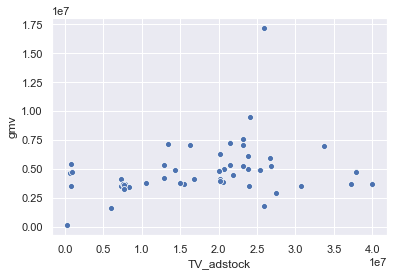

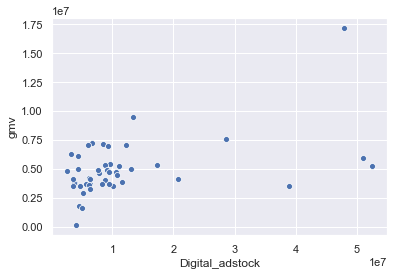

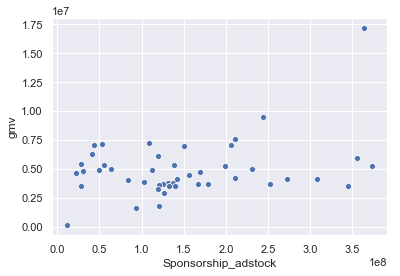

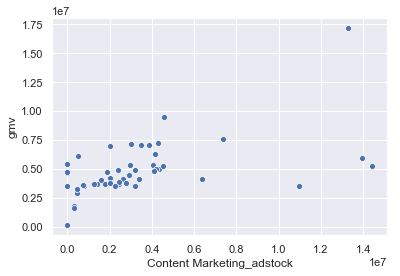

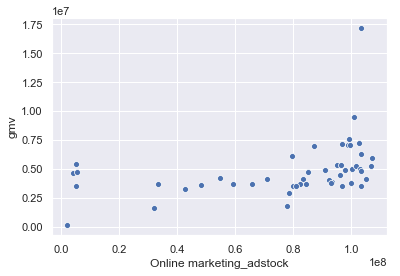

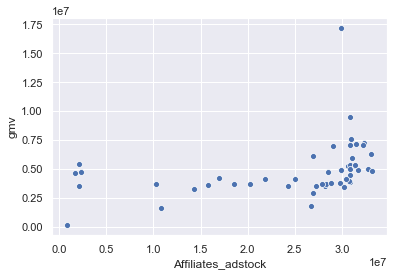

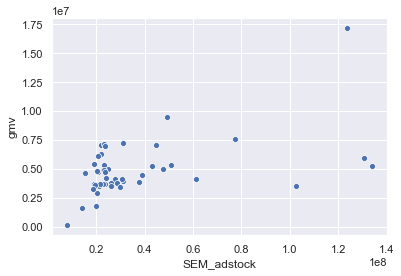

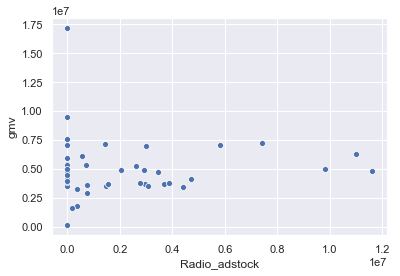

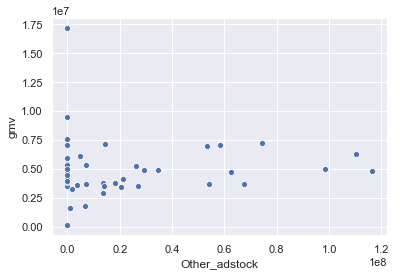

In [64]:
# Plotting the adstock vs gmv
cols = ['TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'Content Marketing_adstock',
       'Online marketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock']

for col in cols:
    sns.scatterplot(x=col, y="gmv", data=df_ha_lagged)
    plt.show()

In [65]:
df_ha_lagged.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [66]:
# Scaling the numeric columns except flag columns
numeric_variables_ga = ['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3']

In [67]:
# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
df_ha_lagged[numeric_variables_ga] = scaler.fit_transform(df_ha_lagged[numeric_variables_ga])

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [68]:
# Copying the dataframe to be used for koyck model
df_ha_koyck = df_ha_lagged.copy()

In [69]:
# Copying the dataframe to be used for distributed lag multiplicative model
df_ha_dist_mult = df_ha_lagged.copy()

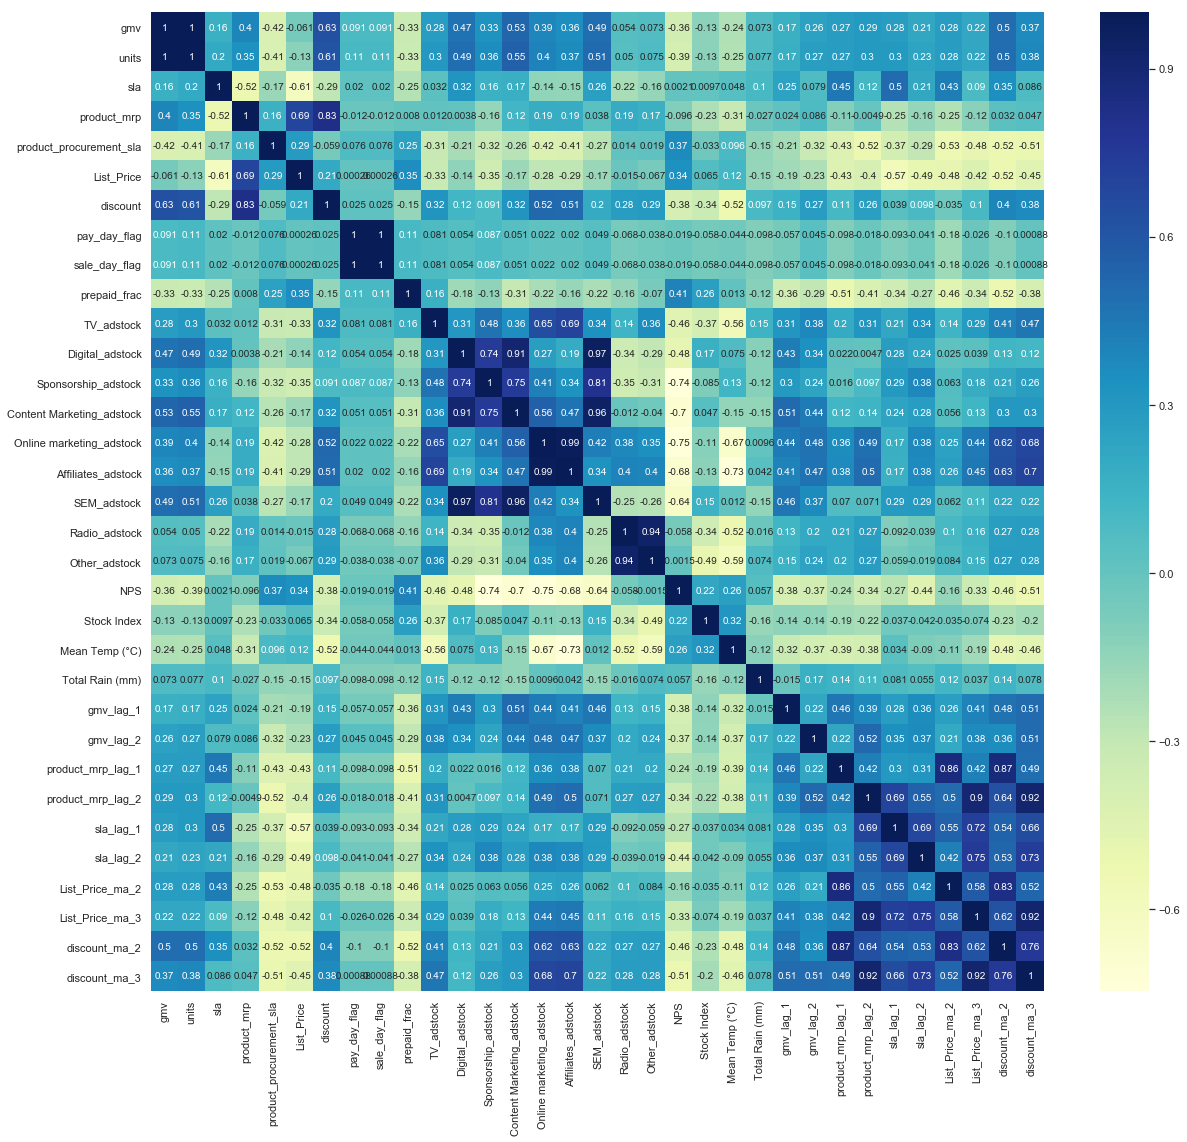

In [70]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ha_lagged.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [71]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. product procurement sla has high corelation with discount. We would drop product procurement sla.
# 3. pay_day_flag and sale_day_flag have high corelation. We would drop pay_day_flag.
# 4. Digital, Content Marketing and SEM have high corelation. We would drop Digital and SEM.
# 5. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 6. Radio and Other have high corealtion. We would drop Other.
# 7. NPS have high negative colinearity with Online marketing. So, we would drop NPS.
# 8. gmv and units has high correlation So we would drop units.
# 9. Sponsorship adstock has high correlation with SEM adstock.
#10. List price is correlated to list_price_ma. So drop List price.


df_ha_lagged.drop(['product_procurement_sla', 'pay_day_flag', 'product_mrp', 'units','Digital_adstock',  'SEM_adstock', 'Affiliates_adstock', 'Other_adstock', 'product_mrp_lag_1', 'product_mrp_lag_2', 'TV_adstock' , 'List_Price' , 'List_Price_ma_3', 'discount_ma_2', 'discount_ma_3' ], axis = 1, inplace = True)

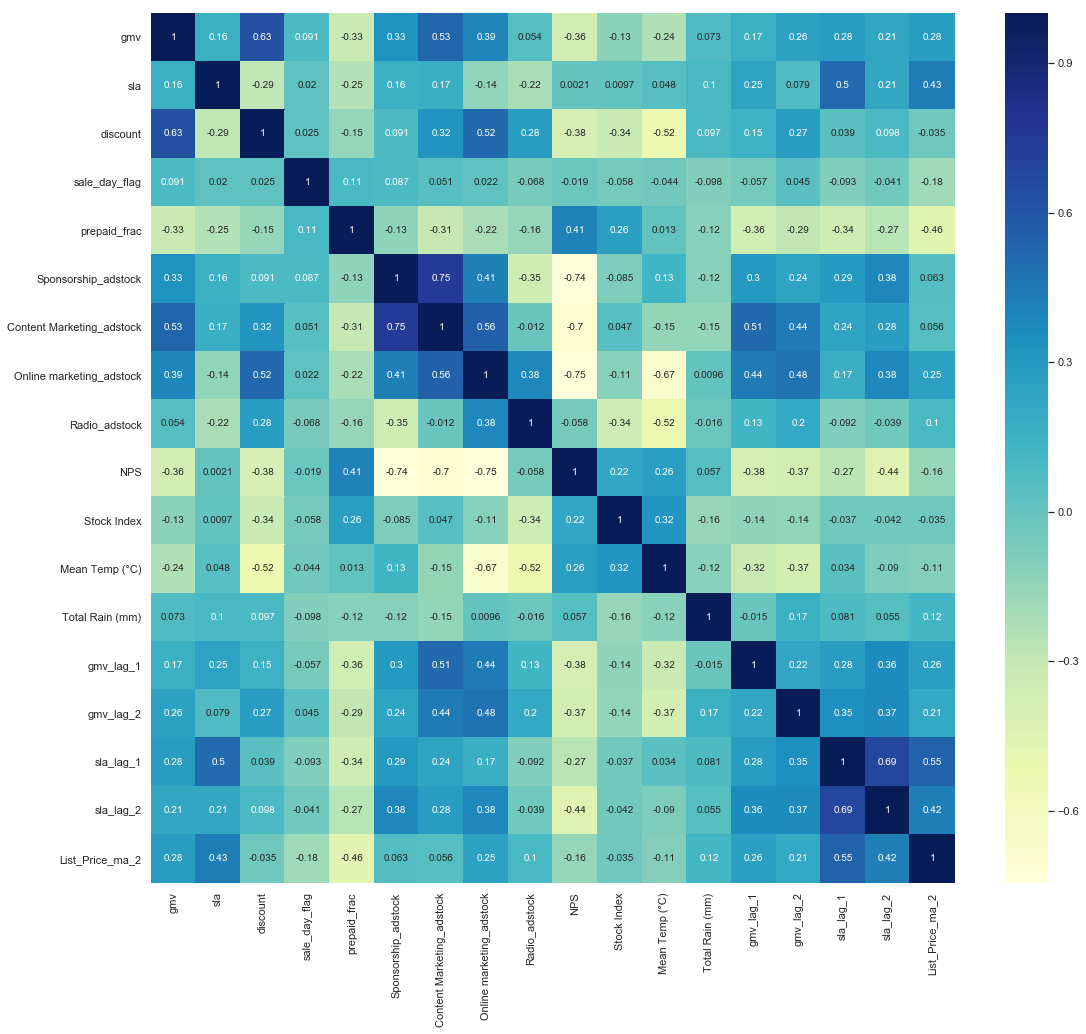

In [72]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ha_lagged.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [73]:
# Split the dataset into  test and train
y = df_ha_lagged.pop('gmv')
X = df_ha_lagged

X_train_ha, X_test_ha, y_train_ha, y_test_ha = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=100)

### Building first model using RFE

In [74]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ha, y_train_ha)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True False False False  True False False False False False False
  True False False False  True]
[ 1  1  8  5  4  1 12 11  3 13  6  9  1  2 10  7  1]


In [75]:
list(zip(X_train_ha.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('discount', True, 1),
 ('sale_day_flag', False, 8),
 ('prepaid_frac', False, 5),
 ('Sponsorship_adstock', False, 4),
 ('Content Marketing_adstock', True, 1),
 ('Online marketing_adstock', False, 12),
 ('Radio_adstock', False, 11),
 ('NPS', False, 3),
 ('Stock Index', False, 13),
 ('Mean Temp (°C)', False, 6),
 ('Total Rain (mm)', False, 9),
 ('gmv_lag_1', True, 1),
 ('gmv_lag_2', False, 2),
 ('sla_lag_1', False, 10),
 ('sla_lag_2', False, 7),
 ('List_Price_ma_2', True, 1)]

In [76]:
# Subset the features selected by rfe1
col = X_train_ha.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ha[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [77]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ha, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     17.14
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.86e-09
Time:                        14:29:24   Log-Likelihood:                 49.806
No. Observations:                  46   AIC:                            -87.61
Df Residuals:                      40   BIC:                            -76.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [78]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.82000
3,Content Marketing_adstock,1.57000
1,sla,1.49000
4,gmv_lag_1,1.49000
2,discount,1.31000
5,List_Price_ma_2,1.29000


In [79]:
# Predictions

X_test_new = X_test_ha[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ha))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ha)**2)

print(RMSE)
print(MSE)

0.05302758956621478
0.002811925255202931


#### Distributed lag model has R-Square = .682 and Adjusted R-Square= .642

### Koyck Model

In [80]:
# Reading the dataset created above
df_ha_koyck.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.47301,1.00000,1,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.26421,0.26569,1.00000,0.18850,0.60726,0.33352,0.12047,0.00000,0,0.12339,...,0.00621,0.00000,1.00000,0.00000,0.37696,0.00000,1.00000,0.00000,0.81633,0.00000
2,0.31059,0.30978,0.92397,0.26537,0.54421,0.34786,0.20439,1.00000,1,0.11549,...,0.26878,0.00621,0.71658,1.00000,1.00000,0.37696,0.87829,1.00000,0.76580,0.79345
3,0.27052,0.28390,0.94011,0.17941,0.60596,0.23700,0.14726,0.00000,0,0.08812,...,0.31487,0.26878,0.74343,0.71658,0.95263,1.00000,0.86028,0.90115,0.77083,0.75317
4,0.19688,0.19842,0.96968,0.24449,0.56100,0.33114,0.14674,0.00000,0,0.10088,...,0.27505,0.31487,0.71340,0.74343,0.96268,0.95263,0.85716,0.90084,0.75999,0.75641


In [81]:
df_ha_koyck.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [82]:
# Let's drop all the lag and moving averages except gmv_lag1 columns which are not used in koyck models

df_ha_koyck.drop(['gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'], axis = 1, inplace = True)

In [83]:
df_ha_koyck.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1'],
      dtype='object')

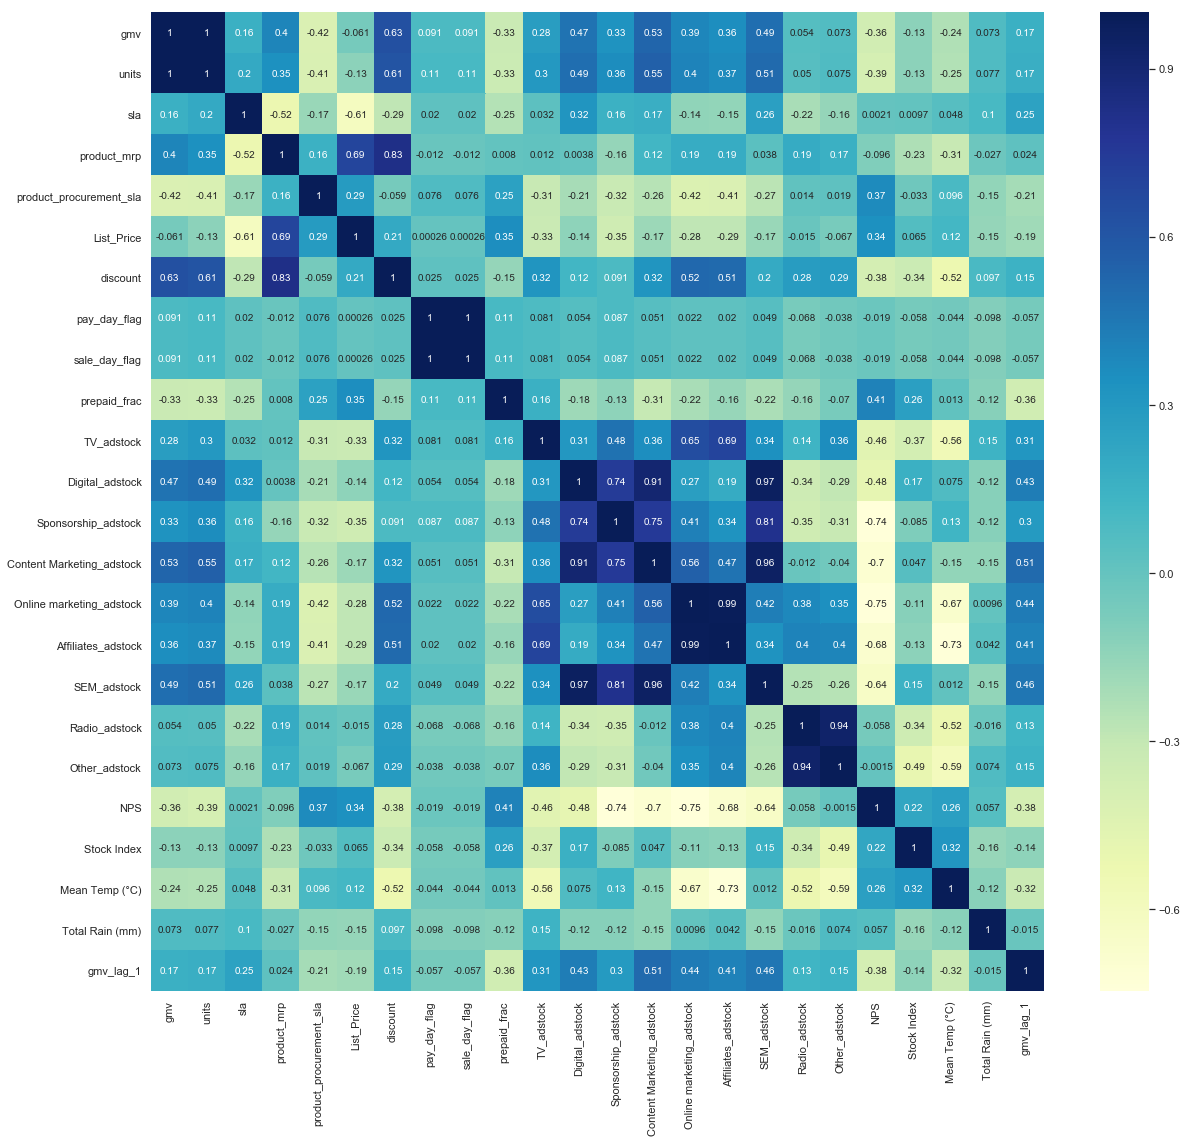

In [84]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ha_koyck.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [85]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. pay_day_flag and sale_day_flag have high corelation. We would drop pay_day_flag.
# 3. Digital, Content Marketing and SEM have high corelation. We would drop Digital and SEM.
# 4. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 5. Radio and Other have high corealtion. We would drop Other.
# 6. gmv and units has high correlation So we would drop units.
# 7. Sponsorship adstock has high correlation with SEM adstock.
# 8. Discount moving averages are highly corelated. Hence dropping 1.



df_ha_koyck.drop(['pay_day_flag', 'product_mrp', 'units','Digital_adstock',  'SEM_adstock', 'Affiliates_adstock', 'Other_adstock', 'Sponsorship_adstock', 'NPS' ], axis = 1, inplace = True)

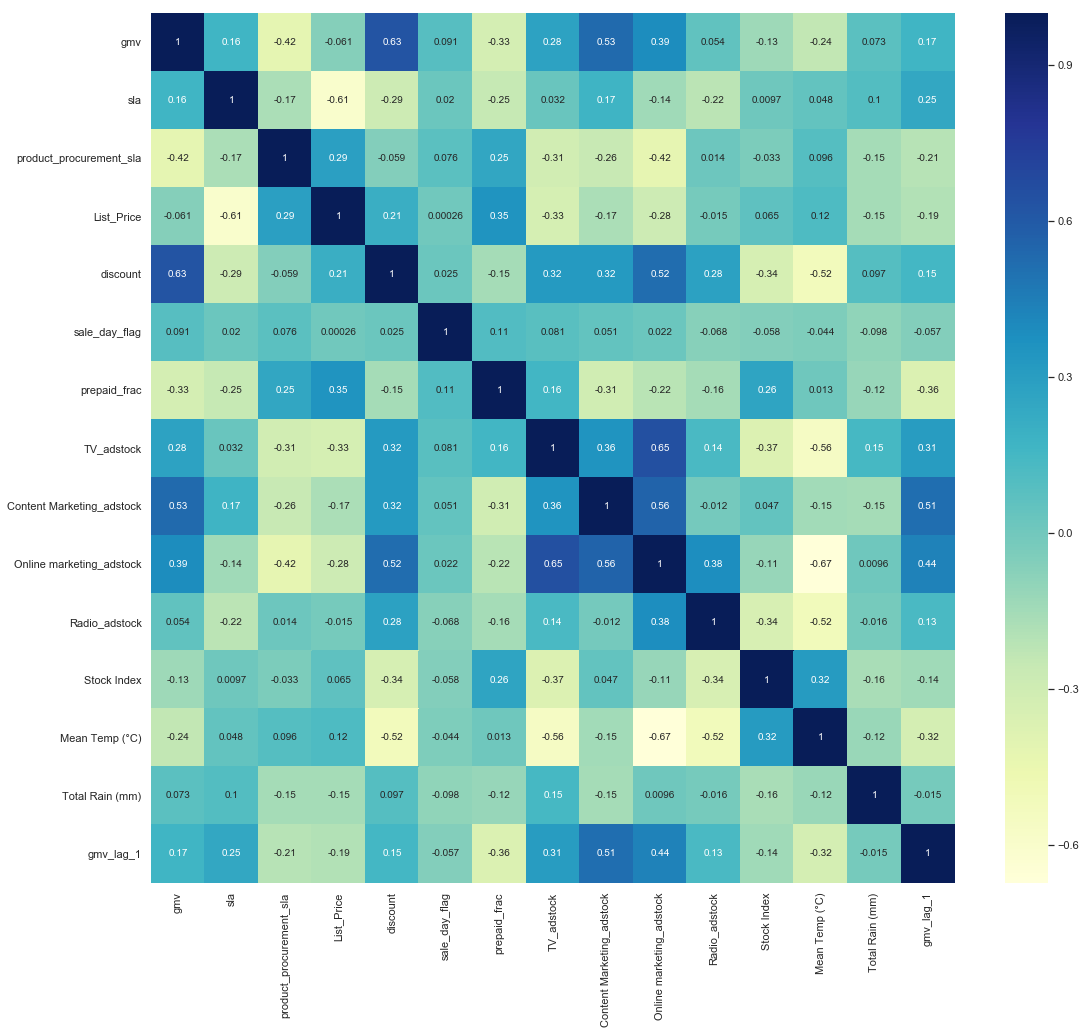

In [86]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ha_koyck.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [87]:
# Split the dataset into  test and train
y = df_ha_koyck.pop('gmv')
X = df_ha_koyck

X_train_ha, X_test_ha, y_train_ha, y_test_ha = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

In [88]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ha, y_train_ha)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True False  True False False False  True False False False False
 False  True]
[ 1  1  3  1  8  4  5  1  2  7  6 10  9  1]


In [89]:
list(zip(X_train_ha.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('List_Price', False, 3),
 ('discount', True, 1),
 ('sale_day_flag', False, 8),
 ('prepaid_frac', False, 4),
 ('TV_adstock', False, 5),
 ('Content Marketing_adstock', True, 1),
 ('Online marketing_adstock', False, 2),
 ('Radio_adstock', False, 7),
 ('Stock Index', False, 6),
 ('Mean Temp (°C)', False, 10),
 ('Total Rain (mm)', False, 9),
 ('gmv_lag_1', True, 1)]

In [90]:
## Check the summary of this model using `statsmodels`.
# Subset the features selected by rfe1
col = X_train_ha.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ha[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [91]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ha, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     18.65
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.57e-09
Time:                        14:29:31   Log-Likelihood:                 51.908
No. Observations:                  46   AIC:                            -91.82
Df Residuals:                      40   BIC:                            -80.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [92]:
##### Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.64000
4,Content Marketing_adstock,1.56000
5,gmv_lag_1,1.40000
3,discount,1.29000
1,sla,1.25000
2,product_procurement_sla,1.12000


In [93]:
# Predictions

X_test_new = X_test_ha[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ha))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ha)**2)

print(RMSE)
print(MSE)

0.05034392263819255
0.002534510546600316


#### Koyck Model is giving us R-square of .7 and adjusted R-square of .662.

### Distributed Lag Multiplicative Model

In [94]:
# Reading the dataset created above
df_ha_dist_mult.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.47301,1.00000,1,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.26421,0.26569,1.00000,0.18850,0.60726,0.33352,0.12047,0.00000,0,0.12339,...,0.00621,0.00000,1.00000,0.00000,0.37696,0.00000,1.00000,0.00000,0.81633,0.00000
2,0.31059,0.30978,0.92397,0.26537,0.54421,0.34786,0.20439,1.00000,1,0.11549,...,0.26878,0.00621,0.71658,1.00000,1.00000,0.37696,0.87829,1.00000,0.76580,0.79345
3,0.27052,0.28390,0.94011,0.17941,0.60596,0.23700,0.14726,0.00000,0,0.08812,...,0.31487,0.26878,0.74343,0.71658,0.95263,1.00000,0.86028,0.90115,0.77083,0.75317
4,0.19688,0.19842,0.96968,0.24449,0.56100,0.33114,0.14674,0.00000,0,0.10088,...,0.27505,0.31487,0.71340,0.74343,0.96268,0.95263,0.85716,0.90084,0.75999,0.75641


In [95]:
df_ha_dist_mult.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [96]:
# Taking natural log

for col in list(df_ha_dist_mult.columns):
    df_ha_dist_mult[col] = np.log(df_ha_dist_mult[col])

In [97]:
df_ha_dist_mult.describe()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
count,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,...,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-1.56083,-1.49335,-0.71432,-1.82793,-0.79329,-1.54189,-1.41312,nan,nan,-2.90746,...,-1.53773,-1.53773,-0.34864,-0.34926,-0.38280,-0.38280,-0.19137,-0.14283,-0.21682,-0.23136
50%,-1.36464,-1.31542,-0.48059,-1.29032,-0.69109,-1.30857,-1.08671,nan,nan,-2.53203,...,-1.34670,-1.34670,-0.29401,-0.29648,-0.27147,-0.27147,-0.15327,-0.11356,-0.18139,-0.18703
75%,-1.18080,-1.15175,-0.37713,-0.71270,-0.57804,-1.09805,-0.65315,0.00000,0.00000,-2.23365,...,-1.16688,-1.16688,-0.19603,-0.19603,-0.21784,-0.21784,-0.14226,-0.10212,-0.07438,-0.11665
max,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000


In [98]:
# Handling the negative infinite value as NaN and filling all NaN as 0
df_ha_dist_mult.replace([-np.inf, np.inf], np.nan,inplace=True)
df_ha_dist_mult.fillna(0,inplace=True)

In [99]:
df_ha_dist_mult.describe()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
count,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,...,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000,49.00000
mean,-1.31057,-1.27652,-0.50368,-1.29215,-0.66469,-1.32789,-1.05585,0.00000,0.00000,-2.27896,...,-1.34748,-1.31349,-0.25520,-0.24998,-0.28085,-0.26973,-0.15535,-0.11502,-0.15676,-0.16439
std,0.43519,0.42994,0.28441,0.99741,0.21046,0.55935,0.64710,0.00000,0.00000,0.94528,...,0.67323,0.69841,0.11606,0.12166,0.16446,0.16466,0.05162,0.04557,0.08951,0.08678
min,-2.41799,-2.43216,-1.30308,-6.09751,-1.10921,-3.20219,-2.64288,0.00000,0.00000,-3.83799,...,-5.08133,-5.08133,-0.42964,-0.42964,-0.97562,-0.97562,-0.26229,-0.22061,-0.32984,-0.33808
25%,-1.56033,-1.47632,-0.70460,-1.77883,-0.79053,-1.52555,-1.40703,0.00000,0.00000,-2.85327,...,-1.53724,-1.53647,-0.34689,-0.34689,-0.37844,-0.35631,-0.18351,-0.13519,-0.21492,-0.22605
50%,-1.33100,-1.28438,-0.47444,-1.26910,-0.68619,-1.28511,-1.07744,0.00000,0.00000,-2.48148,...,-1.31385,-1.29081,-0.29189,-0.29189,-0.26836,-0.26490,-0.15305,-0.11292,-0.17775,-0.18134
75%,-1.16930,-1.15089,-0.36988,-0.58882,-0.53957,-1.09011,-0.58595,0.00000,0.00000,-2.15857,...,-1.15560,-1.06427,-0.16892,-0.16716,-0.21398,-0.16663,-0.13581,-0.09866,-0.07304,-0.09364
max,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [100]:
# Dropping flag variables after taking log
df_ha_dist_mult.drop(['pay_day_flag', 'sale_day_flag' ], axis = 1, inplace = True)

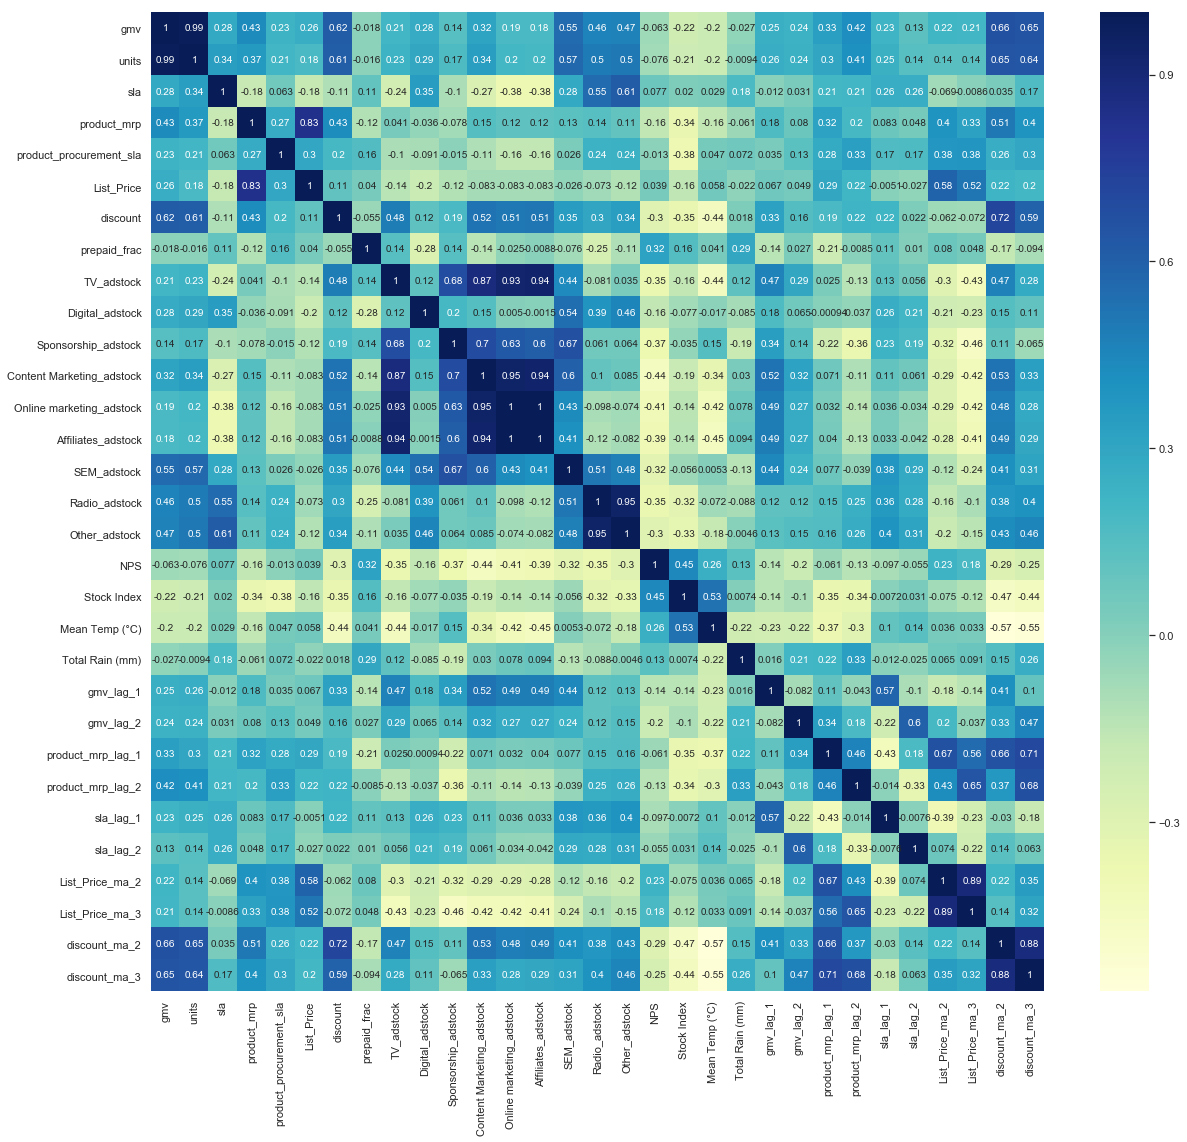

In [101]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ha_dist_mult.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [102]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. TV Adstock, Content Marketing and Affiliate, Online Marketing adstock have high corelation.
# 3. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 4. Radio and Other have high corealtion. We would drop Other.
# 5. gmv and units has high correlation So we would drop units.
# 6. List price moving averages have high corelation.
# 7. discount moving averages have high corealtion.



df_ha_dist_mult.drop([ 'product_mrp', 'units','TV_adstock',  'SEM_adstock', 'Affiliates_adstock', 'Other_adstock', 'TV_adstock', 'Sponsorship_adstock', 'Online marketing_adstock', 'List_Price_ma_3', 'discount_ma_3' ], axis = 1, inplace = True)

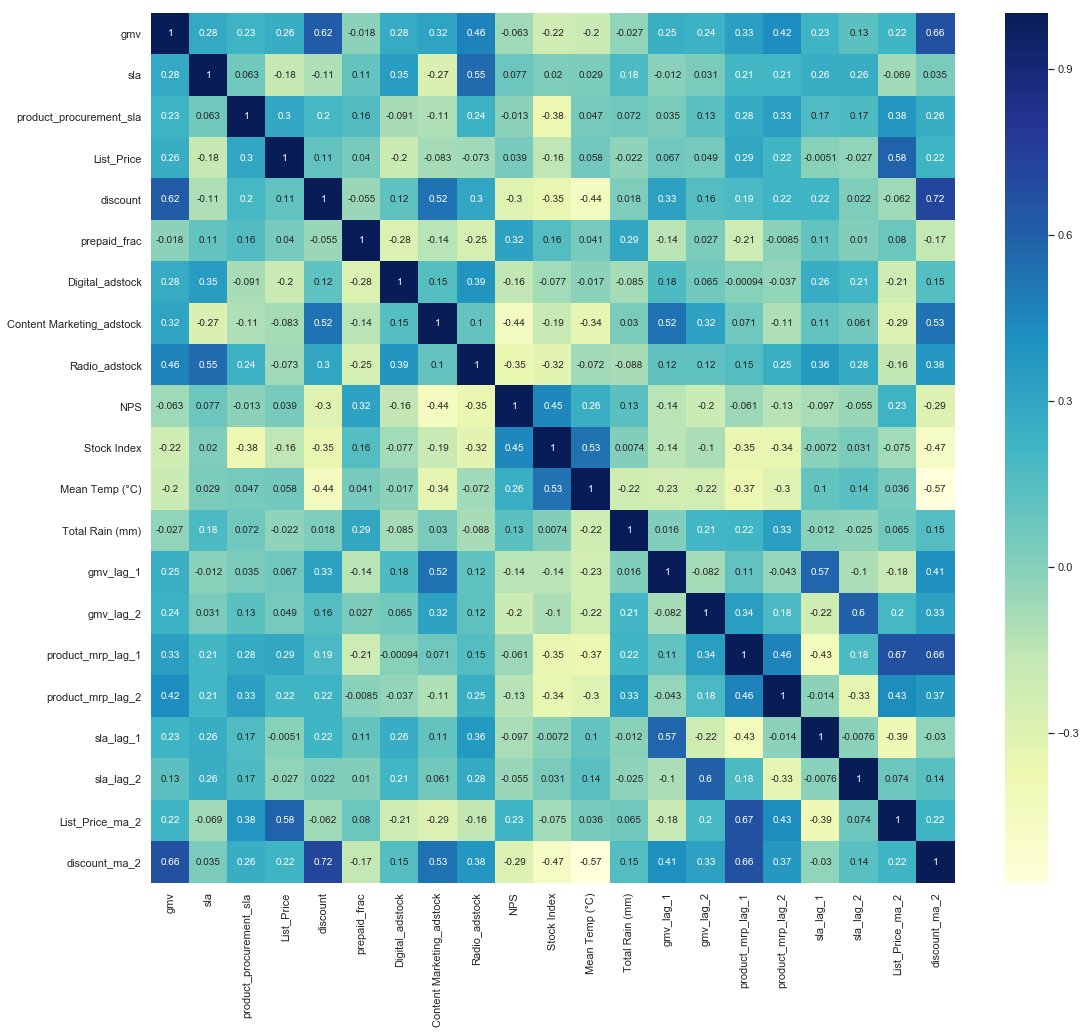

In [103]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ha_dist_mult.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [104]:
# Split the dataset into  test and train
y = df_ha_dist_mult.pop('gmv')
X = df_ha_dist_mult

X_train_ha, X_test_ha, y_train_ha, y_test_ha = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

In [105]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ha, y_train_ha)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True False False False False False False False False False False False
 False False  True  True False False  True  True]
[ 1  2 13  3 11 14  9 12  6 10  4  7 15 16  1  1  8  5  1  1]


In [106]:
list(zip(X_train_ha.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('product_procurement_sla', False, 2),
 ('List_Price', False, 13),
 ('discount', False, 3),
 ('prepaid_frac', False, 11),
 ('Digital_adstock', False, 14),
 ('Content Marketing_adstock', False, 9),
 ('Radio_adstock', False, 12),
 ('NPS', False, 6),
 ('Stock Index', False, 10),
 ('Mean Temp (°C)', False, 4),
 ('Total Rain (mm)', False, 7),
 ('gmv_lag_1', False, 15),
 ('gmv_lag_2', False, 16),
 ('product_mrp_lag_1', True, 1),
 ('product_mrp_lag_2', True, 1),
 ('sla_lag_1', False, 8),
 ('sla_lag_2', False, 5),
 ('List_Price_ma_2', True, 1),
 ('discount_ma_2', True, 1)]

In [107]:
## Check the summary of this model using `statsmodels`.
# Subset the features selected by rfe1
col = X_train_ha.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ha[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [108]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ha, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     20.60
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.97e-10
Time:                        14:29:38   Log-Likelihood:                 2.4756
No. Observations:                  46   AIC:                             7.049
Df Residuals:                      40   BIC:                             18.02
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1544      0.15

In [109]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.58000
2,product_mrp_lag_1,4.63000
4,List_Price_ma_2,2.85000
5,discount_ma_2,2.47000
3,product_mrp_lag_2,1.47000
1,sla,1.25000


In [110]:
# Dropping product_mrp_lag_2 as it has high p-value
col = col.drop('product_mrp_lag_2', 1)

In [111]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ha[col])

lm2 = sm.OLS(y_train_ha, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     25.67
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.07e-10
Time:                        14:29:39   Log-Likelihood:                 2.0140
No. Observations:                  46   AIC:                             5.972
Df Residuals:                      41   BIC:                             15.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1557      0.15

In [112]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.58000
2,product_mrp_lag_1,4.63000
3,List_Price_ma_2,2.59000
4,discount_ma_2,2.37000
1,sla,1.15000


In [113]:
# Predictions

X_test_new = X_test_ha[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm2.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ha))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ha)**2)

print(RMSE)
print(MSE)

0.2587829756447894
0.06696862848357168


#### Distributed Multiplicative Lag Model is giving R-Square = .715, Adjusted R-Square=.687.

### Conclusions :

1. Both the multiplicative models are giving decent performance but none of the Marketing Spends or Adstock variables.
2. Distributed lag and Koyck model have better performance than the Linear model.
3. Distributed Lag, Koyck, and Linear model points to almost same predictor variables.
4. We can see that List Price, Discount and Content Marketing Adstock, Online Marketing Adstock are the most prominent predictors coming from various models.